<a href="https://colab.research.google.com/github/MatiasTamborini/data_science_clusterai_Tamborini/blob/main/clusterai_Matias_Tamborini_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sábado - Grupo 11__<br/>
__Elaborado por: Hugo Britez y Matías Tamborini__   

# Intervenciones de seguridad vial AUSA 
# Analysis exploratorio de datos

Seleccionamos un dataset del Gobierno de la Ciudad de Buenos Aires, el cual nos muestra las intervenciones de seguridad vial en las autopistas de AUSA entre 2014 y la actualidad (julio 2020). La fecha de selección es 04/09/2020.

Link a dataset: https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa/archivo/juqdkmgo-1872-resource 



In [ ]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


In [ ]:
#Vinculamos el notebook con My Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos el dataset mencionado anteriormente
#intervenciones = pd.read_csv(r'C:\Users\Matias\Desktop\UTN\Python\Data Science - UTN - Martín Palazzo\TP Anual\intervenciones-de-seguridad-vial.csv')


In [ ]:
#Para Google Colab cambia la ruta
intervenciones = pd.read_csv('/content/drive/My Drive/Data Science/intervenciones-de-seguridad-vial.csv')



In [ ]:
intervenciones.head(3)

,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
0,201401,2014-01-01,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0
1,201401,2014-01-01,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2,201401,2014-01-01,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0


In [ ]:
#Obtenemos el tamaño del dataframe
np.shape(intervenciones)
print("El dataset se compone de "+ str(np.shape(intervenciones)[0]) + " renglones y " + str(np.shape(intervenciones)[1]) + " columnas")

El dataset se compone de 6639 renglones y 15 columnas


## **ANÁLISIS DE CALIDAD DE DATOS**

In [ ]:
# Revisamos si existen columnas que contengan valores faltantes (NaNs o Nulls)
nulos_columnas = intervenciones.isnull().sum()
nulos_columnas

periodo                       0
fecha                         0
hora                          0
autopista                     0
banda_y_o_ramal               0
pk                            0
condiciones_meteorologicas    0
superficie_de_la_via          0
lesionados                    0
fallecidos                    0
tipo_de_siniestro             0
moto                          0
liviano                       0
bus                           0
camion                        0
dtype: int64

In [ ]:
#evaluamos los valores únicos que tienen cada columna
print("\n", intervenciones['autopista'].unique())
print("\n", intervenciones['tipo_de_siniestro'].unique())


 ['AU CAMPORA' 'AU DELLEPIANE' 'AU 25 DE MAYO' 'AU PERTIO MORENO'
 'AV LUGONES' 'AV CANTILO' 'AU FRONDIZI' 'AU ILLIA' 'AV. LUGONES'
 'AU PERITO MORENO' 'DIST. 9 DE JULIO' 'AV. CANTILO' 'TRANSICION RAMAL 2'
 'DIST. UDAONDO' 'TRANSICION RAMAL 3' 'PTE. SCALABRINI ORTIZ'
 'TRANSICION RAMAL 1' 'PASEO DEL BAJO' 'DIST. DELLEPIANE']

 ['COLISION CON OBSTACULO FIJO' 'COLISION CON DOS O MAS VEHICULOS'
 'OBSTACULO NO FIJO' 'SINIESTRO DE UN SOLO VEHICULO / SIN COLISION'
 'OTRO TIPO DE SINIESTRO' 'OTRO' 'CON DOS O MAS VEHICULOS-IMPACTO TRASERO']


In [ ]:
print("\n", intervenciones['superficie_de_la_via'].unique())
print("\n", intervenciones['condiciones_meteorologicas'].unique())



 ['SECA' 'MOJADA/HUMEDA' 'OTRO' 'INUNDADA' '<SD>']

 ['BUENO' 'LLUVIOSO' 'VIENTOS FUERTES' 'NIEBLA, BRUMA O HUMO' 'NIEBLA'
 '<SD>']


In [ ]:
#Buscamos la cantidad de valores SD dentro de la columna superficie_de_la_via
sd_sup=intervenciones.loc[intervenciones.superficie_de_la_via =='<SD>']
np.shape(sd_sup)

(1, 15)

In [ ]:
#Buscamos la cantidad de valores SD dentro de la columna superficie_de_la_via
sd_cond=intervenciones.loc[intervenciones.condiciones_meteorologicas =='<SD>']
np.shape(sd_cond)

(1, 15)

Los trataremos como Nulls asumiendo que son datos que no fueron cargados. Procederemos a eliminarla ya que son solo 2 registros.

In [ ]:
#Eliminamos la única fila con SD.
intervenciones = intervenciones[intervenciones.condiciones_meteorologicas != '<SD>']
intervenciones = intervenciones[intervenciones.superficie_de_la_via != '<SD>']
np.shape(intervenciones)

(6638, 15)

Vemos que al eliminar los valores <SD> solo se eliminó una sample por lo que ambos pertenecían al mismo registro.

Para el análisis decidimos reemplazar el valor "NIEBLA" por "NIEBLA, BRUMA O HUMO". 

In [ ]:
#Reemplazamos
intervenciones['autopista'] = intervenciones['autopista'].replace(['AU PERTIO MORENO'],'AU PERITO MORENO')
intervenciones['autopista'] = intervenciones['autopista'].replace(['AV. CANTILO'],'AV CANTILO')
intervenciones['autopista'] = intervenciones['autopista'].replace(['AV. LUGONES'],'AV LUGONES')
intervenciones['condiciones_meteorologicas'] = intervenciones['condiciones_meteorologicas'].replace(['NIEBLA'],'NIEBLA, BRUMA O HUMO')
print("\n", intervenciones['superficie_de_la_via'].unique())
print("\n", intervenciones['condiciones_meteorologicas'].unique())
print("\n", intervenciones['autopista'].unique())


 ['SECA' 'MOJADA/HUMEDA' 'OTRO' 'INUNDADA']

 ['BUENO' 'LLUVIOSO' 'VIENTOS FUERTES' 'NIEBLA, BRUMA O HUMO']

 ['AU CAMPORA' 'AU DELLEPIANE' 'AU 25 DE MAYO' 'AU PERITO MORENO'
 'AV LUGONES' 'AV CANTILO' 'AU FRONDIZI' 'AU ILLIA' 'DIST. 9 DE JULIO'
 'TRANSICION RAMAL 2' 'DIST. UDAONDO' 'TRANSICION RAMAL 3'
 'PTE. SCALABRINI ORTIZ' 'TRANSICION RAMAL 1' 'PASEO DEL BAJO'
 'DIST. DELLEPIANE']


In [ ]:
#Vemos los valores que hay en la columna pk
print("\n", intervenciones['pk'].unique())


 ['600' '5900' '5400' '4700' '3800' '4000' '7000' 'RAMAL ENLACE' '5600'
 '3200' '1000' '10300' 'RAMPA ACCESO' '9050' 'RAMPA EGRESO' '2000' '10200'
 '200' '4500' '8600' '1700' '1600' '5800' '4300' '7500' '8800' 'RAMAL 5'
 '5000' '300' '0' '5300' '2500' '5500' '7400' '2800' '9200' '2100'
 'RAMAL 2BIS' '700' '2700' '1800' '5100' '1300' '500' '7700' '3300' '3700'
 '8200' '6000' '8500' '3600' '2400' '9000' '3500' '6600' '9100' '6900'
 '800' '1100' '9600' '7200' '10100' '1200' '6500' '100' '3000' '5200'
 '2300' '1500' '4600' '7800' 'PUENTE S. ORTIZ' '1400' '2600' '3400' '7100'
 '400' '4200' '900' '401' '9300' '4900' '8400' '5700' '9800' '8700' '8000'
 '6100' '4800' '7600' '8300' '9400' '3100' '2900' '2200' '8100' '1900'
 '8900' 'RAMAL 3' '6200' '6300' '4400' '10400' '3900' '2599' '7300'
 'RAMAL 2' '9700' '6800' 'RAMAL 4' '6400' '9900' '9500' 'RAMAL 8' '4100'
 '550' '3150' '10500' 'RAMAL 1BIS' '1350' '6700' '5550' '8550' '10000'
 'RAMAL 2/1' '7900' 'RAMAL 2/2BIS' '450' 'RAMAL 1' '350' '860' 

In [ ]:
print("\n", intervenciones['banda_y_o_ramal'].unique())


 ['ASCENDENTE' 'DESCENDENTE' 'TRANSICION RAMAL 2' 'TRANSICION RAMAL 4'
 'TRANSICION RAMAL 3' 'DISTRIBUIDOR 9 DE JULIO' 'PUENTE SCALABRINI ORTIZ'
 'DISTRIBUIDOR UDAONDO' 'TRANSICION RAMAL 1' 'DISTRIBUIDOR DELLEPIANE'
 'CARRIL METROBUS' 'PUENTE ANGEL LABRUNA' 'RAMAL 1 BIS' 'RAMAL 2 BIS'
 'RAMAL 6' 'RAMAL DE ENLACE' ' ' 'RAMAL 4' 'RAMAL DE ENLACE (AU1/AU6)'
 'RAMAL 3/4' 'RAMAL 8' 'RAMAL DE EGRESO' 'RAMAL 1' 'RAMAL 3'
 'PTE. LABRUBNA' '-' 'DIST. NORTE - RAMAL 4' 'DIST. SUR - RAMAL 1'
 'RAMAL 12' 'DIST. SUR - RAMAL 2' 'RAMAL 11']


## ANÁLISIS DESCRIPTIVO

      * Análisis estacional de lesionados vs fallecidos
      * Análisis cuantitativo de lesionados
      * Correlaciones entre autopistas
      * Análisis cuantitativo de las intervenciones
      * Intervenciones y reclamos


In [ ]:
#Nos aseguramos que la columna fechaa este en formato fecha (datetime)
intervenciones.fecha=pd.to_datetime(intervenciones.fecha)


In [ ]:
#Agregamos columnas para tener por separado día, mes y año
intervenciones['dia'] = intervenciones.fecha.dt.day
intervenciones['mes'] = intervenciones.fecha.dt.month
intervenciones['año'] = intervenciones.fecha.dt.year
intervenciones.tail(2)


,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,dia,mes,año
6637,202007,2020-07-31,17,AU 25 DE MAYO,DESCENDENTE,7500,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,0,0,1,31,7,2020
6638,202007,2020-07-31,17,AU DELLEPIANE,ASCENDENTE,500,BUENO,SECA,0,0,OTRO,0,1,0,0,31,7,2020


In [ ]:
np.shape(intervenciones)

(6638, 18)

### * Gráficos comparativo Lesionados vs Fallecidos

In [ ]:
#Agrupamos por año la cantidad de lesionados y fallecidos
intervenciones_x_año = intervenciones.groupby(["año"])["lesionados", "fallecidos"].sum()
intervenciones_x_año

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,lesionados,fallecidos
año,,
2014,684,6
2015,716,12
2016,683,9
2017,743,14
2018,579,5
2019,476,6
2020,116,3


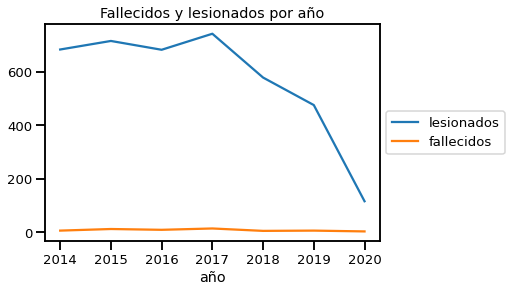

In [ ]:
#Gráfico comparativo de lesionados y fallecidos por año
sns.set_context("talk", font_scale=0.8)
intervenciones_x_año.plot(title = "Fallecidos y lesionados por año" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Si bien el año 2020 todavia no se cerro la tendencia indica que la cantidad de lesionados en los ultimos 3 años está disminuyendo. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


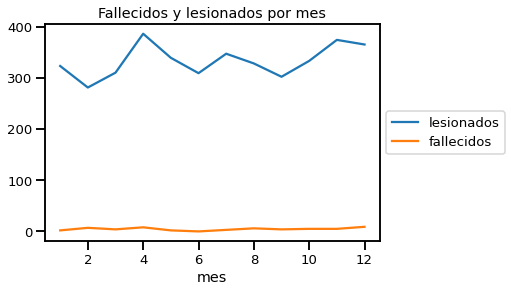

In [ ]:
#Agrupamos por meses la cantidad de lesionados y fallecidos
intervenciones_x_mes = intervenciones.groupby(["mes"])["lesionados", "fallecidos"].sum()

sns.set_context("talk", font_scale=0.8)
intervenciones_x_mes.plot(title = "Fallecidos y lesionados por mes" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

A continuacion realizamos el analisis para poder detectar si el pico de abril se mantiene en todos los años del analisis. 

<Figure size 2880x288 with 0 Axes>

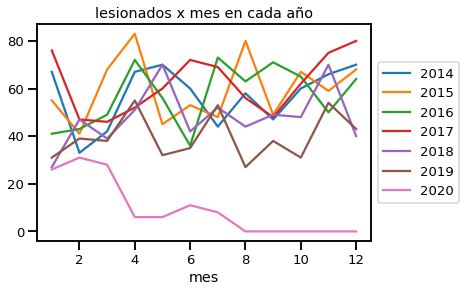

In [ ]:
#Realizamos una tabla pivote con indice mes y columna año.
semana_santa = pd.pivot_table(intervenciones, values = 'lesionados', columns = 'año', index = 'mes',fill_value=0, aggfunc = np.sum)
#Gráfico comparativo de lesionados x mes en cada año
sns.set_context("talk", font_scale=0.8)
plt.figure(figsize=(40,4))
semana_santa.plot(title = "lesionados x mes en cada año" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Se observa que en el mes de abril hay más accidentes a excepción del 2017. En principio se presume una relación con el feriado de semana santa. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


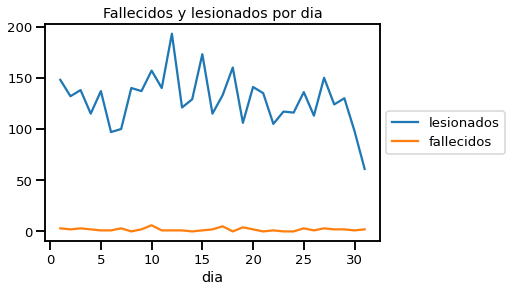

In [ ]:
#Agrupamos por día la cantidad de lesionados y fallecidos
intervenciones_x_dia = intervenciones.groupby(["dia"])["lesionados", "fallecidos"].sum()

sns.set_context("talk", font_scale=0.8)
intervenciones_x_dia.plot(title = "Fallecidos y lesionados por dia" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#Agrupamos por periodo las intervenciones agrupados por tipo de vehículo.
intervenciones['month_year'] = intervenciones['fecha'].dt.to_period('M')
intervenciones_x_moto = intervenciones.groupby(["month_year"])["moto"].sum()
intervenciones_x_liviano = intervenciones.groupby(["month_year"])["liviano"].sum()
intervenciones_x_bus = intervenciones.groupby(["month_year"])["bus"].sum()
intervenciones_x_camion = intervenciones.groupby(["month_year"])["camion"].sum()

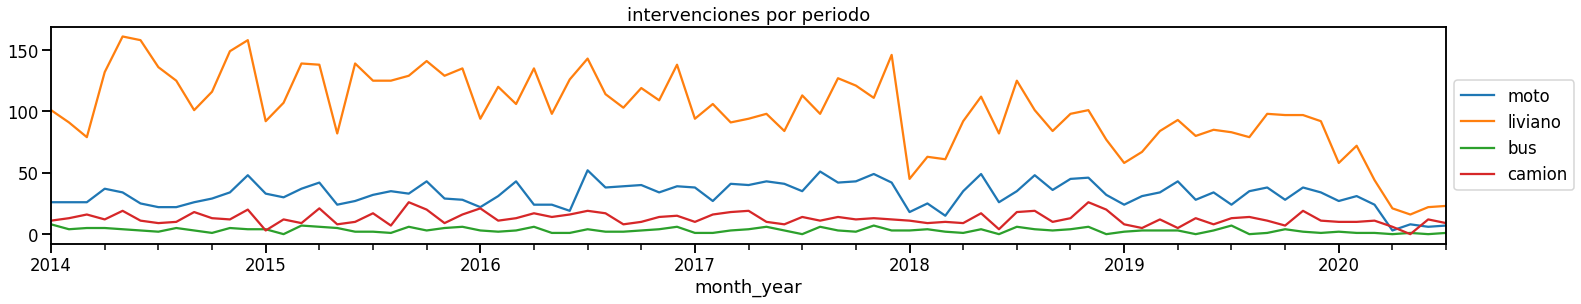

In [ ]:
plt.figure(figsize=(25,4))
sns.set_context("talk", font_scale=1)
intervenciones_x_moto.plot(title = "intervenciones por periodo" , label = "moto")
intervenciones_x_liviano.plot(title = "intervenciones por periodo" , label = "liviano")
intervenciones_x_bus.plot(title = "intervenciones por periodo" , label = "bus")
intervenciones_x_camion.plot(title = "intervenciones por periodo" , label = "camion")



plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### * Análisis cuantitativo lesionados

In [ ]:

dataset_agrupado_ramal = intervenciones.groupby(["mes","banda_y_o_ramal"],as_index=False)["lesionados", "fallecidos"].sum()
dataset_agrupado_ramal.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,mes,banda_y_o_ramal,lesionados,fallecidos
0,1,ASCENDENTE,161,1
1,1,DESCENDENTE,143,1
2,1,DIST. SUR - RAMAL 1,1,0


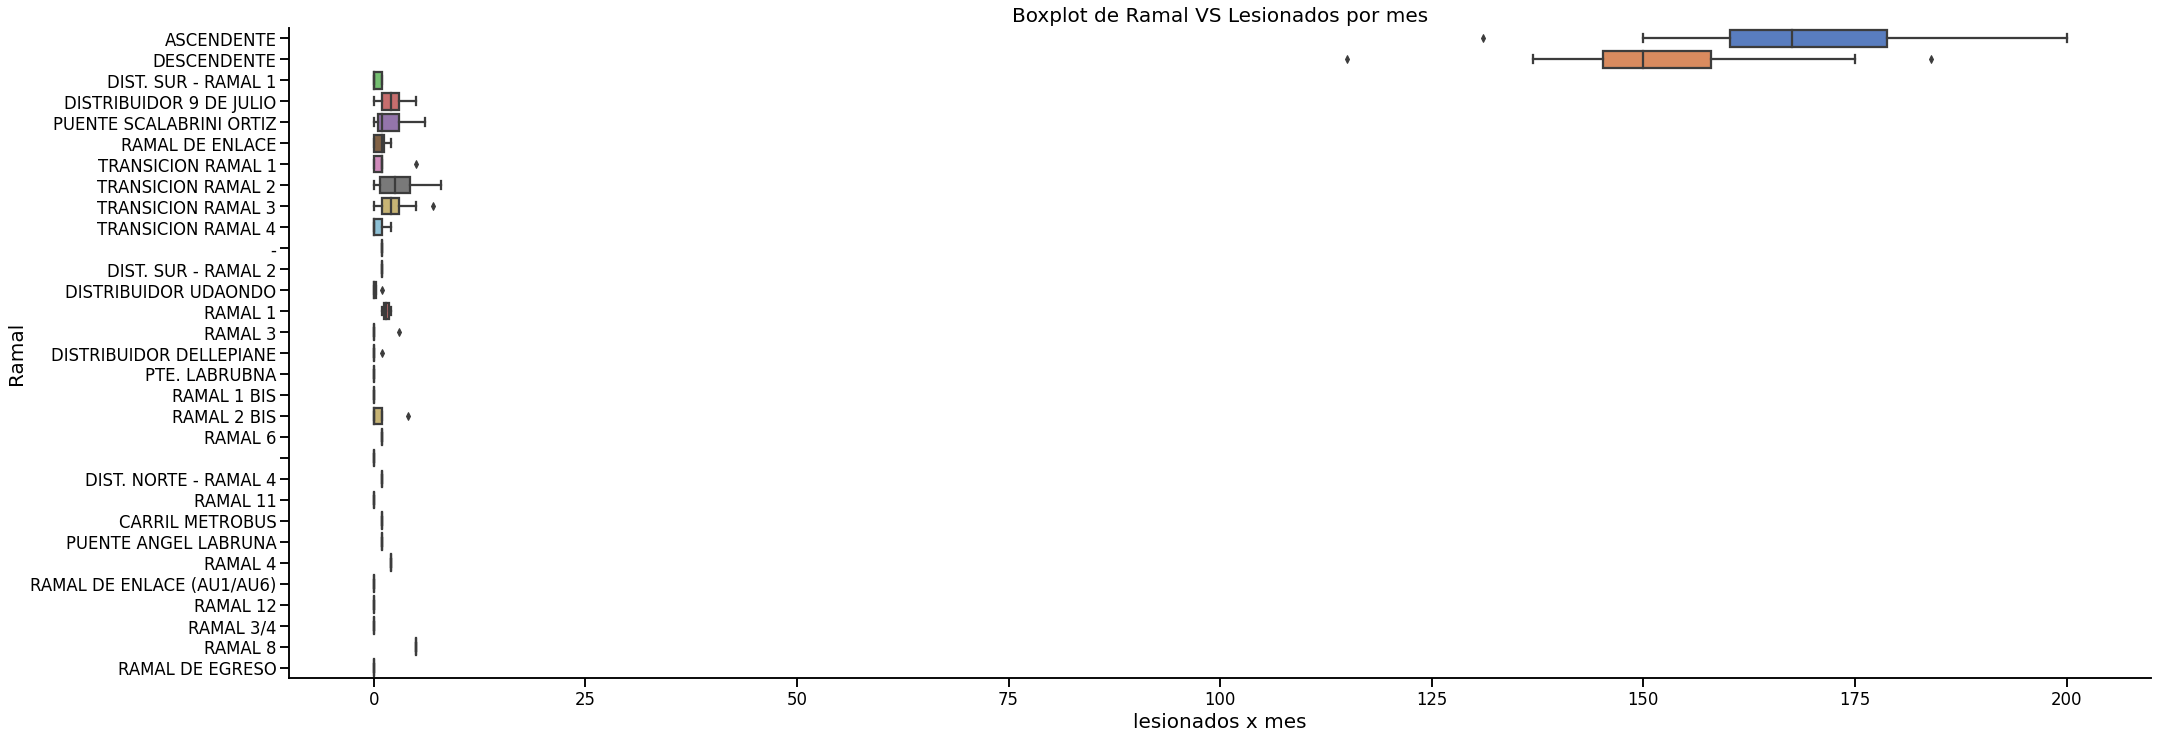

In [ ]:
box_autopsita = sns.catplot(x="lesionados",y="banda_y_o_ramal",
                data=dataset_agrupado_ramal, 
                kind="box",
                palette = "muted",
                height = 10 ,aspect=3)
plt.xlabel("lesionados x mes",size = 20)
plt.ylabel("Ramal",size = 20)
plt.title('Boxplot de Ramal VS Lesionados por mes',size = 20)
plt.show()

Se observa como Ascendente y Descendente toman valores mucho mayores al resto y los deja fuera de escala, es por esto que armaremos 2 boxplots por separado uno para estos dos ramales y otro para el resto de los ramales.

Ascendente: Alejarse del kilometro 0 (ubicado en plaza Mariano Moreno, Capital Federal), sentido Provincia de Buenos Aires

Descendente: Acercarse al kilometro 0 (ubicado en plaza Mariano Moreno, Capital Federal), sentido Capital Federal.

In [ ]:
#Filtramos por ramal ascendente y descendente
modificado = dataset_agrupado_ramal[dataset_agrupado_ramal.banda_y_o_ramal.isin(['ASCENDENTE', 'DESCENDENTE'])]
modificado.head(3)

,mes,banda_y_o_ramal,lesionados,fallecidos
0,1,ASCENDENTE,161,1
1,1,DESCENDENTE,143,1
11,2,ASCENDENTE,158,4


In [ ]:
#Fitramos por todos los ramales que no sean ascendente y descendente
modificado1= dataset_agrupado_ramal[~dataset_agrupado_ramal.banda_y_o_ramal.isin(['ASCENDENTE', 'DESCENDENTE'])]
modificado1.head(3)

,mes,banda_y_o_ramal,lesionados,fallecidos
2,1,DIST. SUR - RAMAL 1,1,0
3,1,DISTRIBUIDOR 9 DE JULIO,3,0
4,1,PUENTE SCALABRINI ORTIZ,1,0


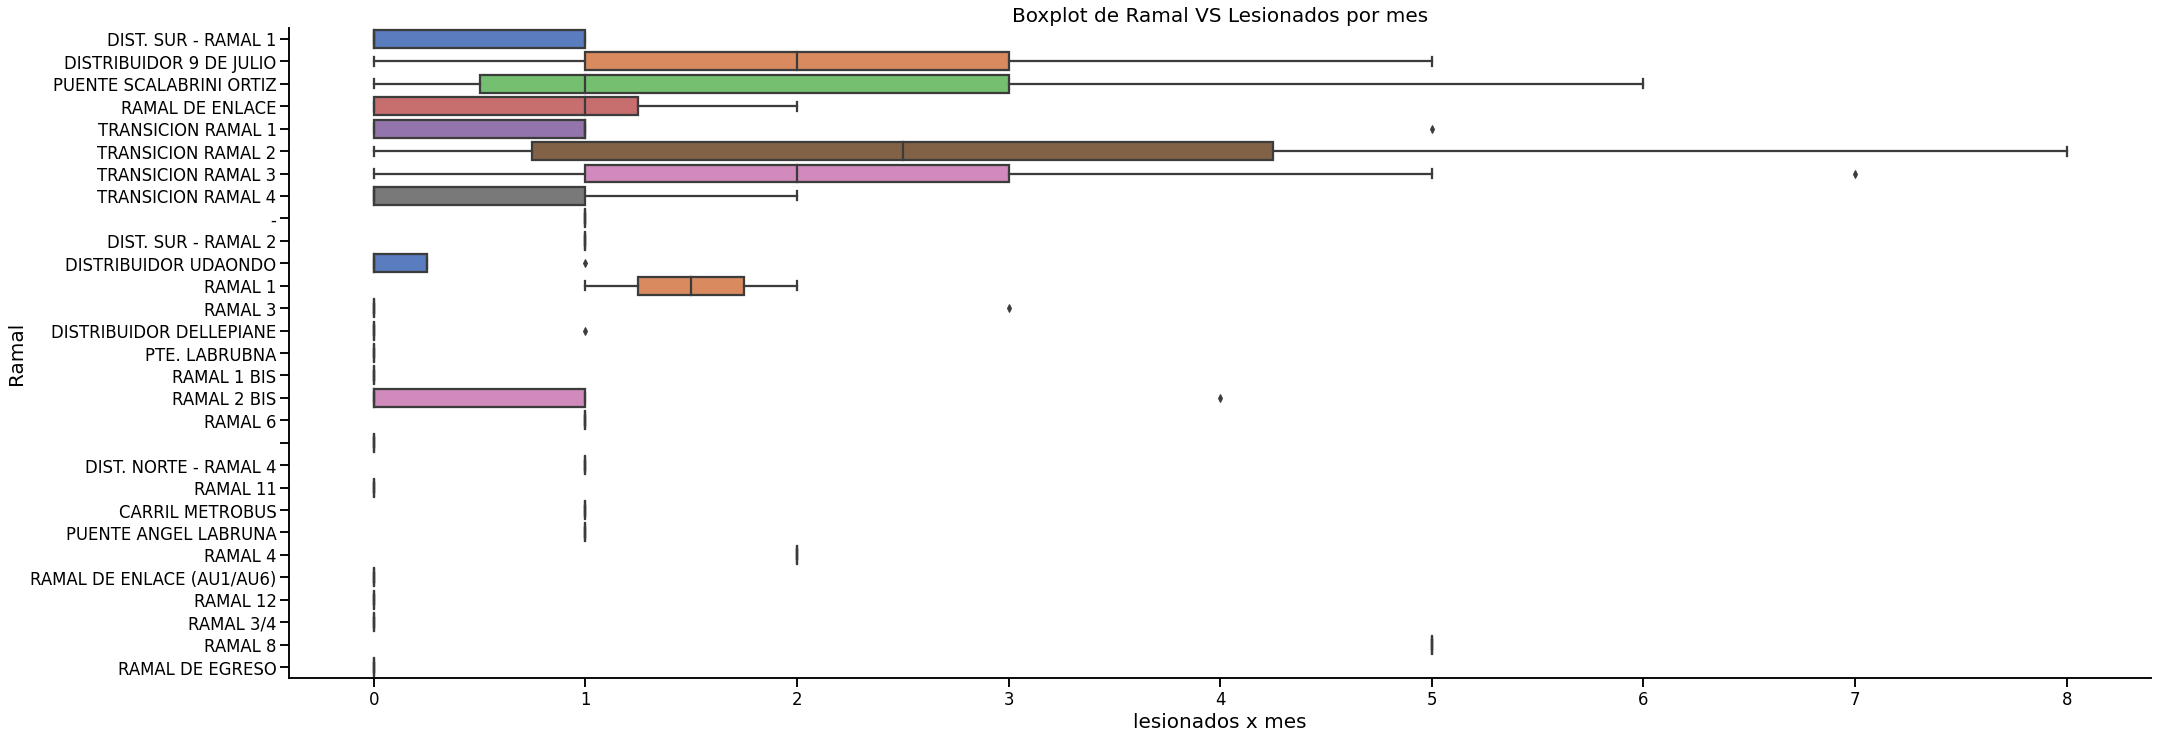

In [ ]:
box_autopsita = sns.catplot(x="lesionados",y="banda_y_o_ramal",
                data=modificado1, 
                kind="box",
                palette = "muted",
                height = 10 ,aspect=3)
plt.xlabel("lesionados x mes",size = 20)
plt.ylabel("Ramal",size = 20)
plt.title('Boxplot de Ramal VS Lesionados por mes',size = 20)
plt.show()

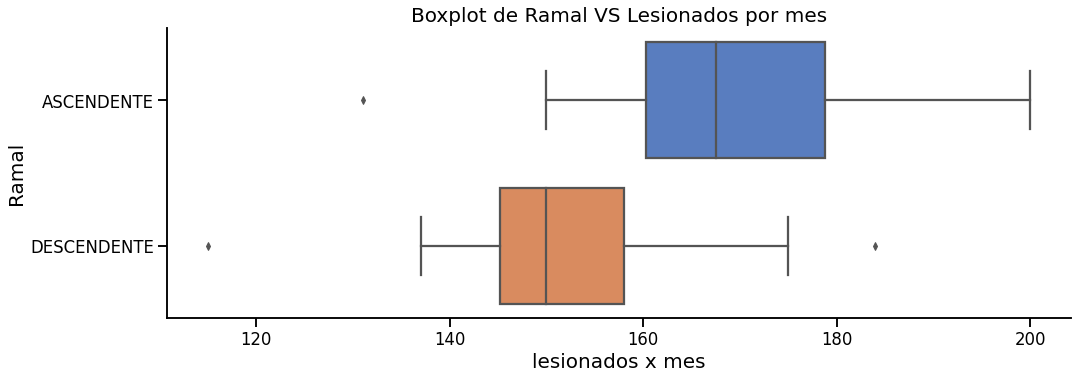

In [ ]:
box_autopsita = sns.catplot(x="lesionados",y="banda_y_o_ramal",
                data=modificado, 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("lesionados x mes",size = 20)
plt.ylabel("Ramal",size = 20)
plt.title('Boxplot de Ramal VS Lesionados por mes',size = 20)
plt.show()

Los valores del tercer cuartil del ramal DESCENDENTE no llegan ni al primer cuartil del ramal ASCENDENTE.

In [ ]:
dataset_agrupado_periodo_autopista = intervenciones.groupby(["periodo","autopista"],as_index=False)["lesionados", "fallecidos"].sum()
dataset_agrupado_periodo_autopista.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,periodo,autopista,lesionados,fallecidos
0,201401,AU 25 DE MAYO,20,1
1,201401,AU CAMPORA,1,0
2,201401,AU DELLEPIANE,5,0


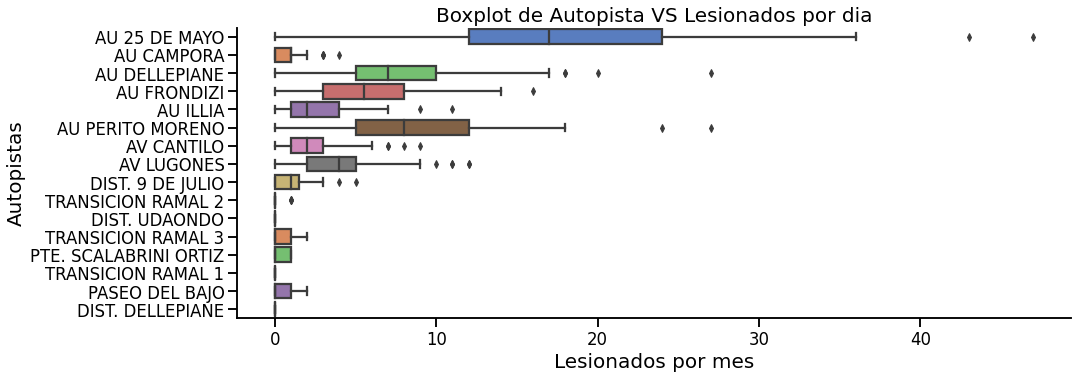

In [ ]:
box_autopista = sns.catplot(x="lesionados",y="autopista",
                data=dataset_agrupado_periodo_autopista, 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)


plt.xlabel("Lesionados por mes",size = 20)
plt.ylabel("Autopistas",size = 20)
plt.title('Boxplot de Autopista VS Lesionados por dia',size = 20)
plt.show()

La media de la Autopista 25 de Mayo toma valores muy altos en comparación del restom, incluso superando gran cantidad de outliers.

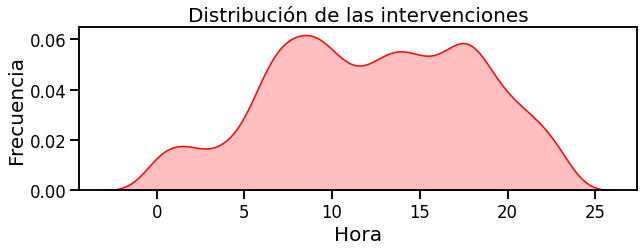

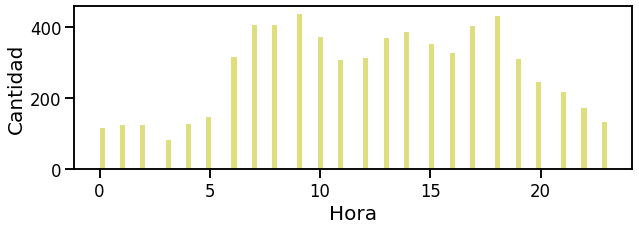

In [ ]:
# Distribucion de intervenciones por hora
plt.figure(figsize=(10,3))
g = sns.kdeplot(intervenciones.hora, color="red", shade = True)
plt.xlabel("Hora",size = 20)
plt.ylabel("Frecuencia",size = 20)
plt.title('Distribución de las intervenciones',size = 20)
plt.show()

# En este segundo plot vamos a ver el histograma de la cantidad de intervenciones en funcion de la hora.
# El parametro bins define la cantidad de sub-intervalos en los que vamos a dividir el eje-x, es decir las barritas.
plt.figure(figsize=(10,3))
plt.hist(intervenciones['hora'], bins=100,color='y' ,alpha=0.5)
plt.xlabel("Hora",size = 20)
plt.ylabel("Cantidad",size = 20)
plt.show()

Como se observa en las distribuciones los picos de intervenciones coinciden con las horas pico.  

## * Correlación entre autopistas

In [ ]:
pivot0 = pd.pivot_table(intervenciones, values = 'lesionados', columns = 'autopista', index = 'periodo',fill_value=0, aggfunc = np.sum)
pivot0.head()

autopista,AU 25 DE MAYO,AU CAMPORA,AU DELLEPIANE,AU FRONDIZI,AU ILLIA,AU PERITO MORENO,AV CANTILO,AV LUGONES,DIST. 9 DE JULIO,DIST. DELLEPIANE,DIST. UDAONDO,PASEO DEL BAJO,PTE. SCALABRINI ORTIZ,TRANSICION RAMAL 1,TRANSICION RAMAL 2,TRANSICION RAMAL 3
periodo,,,,,,,,,,,,,,,,
201401,20,1,5,1,2,10,3,5,0,0,0,0,0,0,0,0
201402,17,1,5,6,0,8,0,4,0,0,0,0,0,0,0,0
201403,14,0,8,6,1,13,3,4,0,0,0,0,0,0,0,0
201404,21,1,5,9,1,10,3,4,0,0,0,0,0,0,0,0
201405,30,0,8,13,4,12,1,0,0,0,0,0,0,0,0,0


In [ ]:
correlacion = pivot0.corr()
correlacion.head(3)

autopista,AU 25 DE MAYO,AU CAMPORA,AU DELLEPIANE,AU FRONDIZI,AU ILLIA,AU PERITO MORENO,AV CANTILO,AV LUGONES,DIST. 9 DE JULIO,DIST. DELLEPIANE,DIST. UDAONDO,PASEO DEL BAJO,PTE. SCALABRINI ORTIZ,TRANSICION RAMAL 1,TRANSICION RAMAL 2,TRANSICION RAMAL 3
autopista,,,,,,,,,,,,,,,,
AU 25 DE MAYO,1.000000,-0.053503,0.399315,0.242691,0.215774,0.366209,0.239321,0.286234,-0.206323,NaN,NaN,-0.225182,-0.150613,NaN,-0.174766,-0.220428
AU CAMPORA,-0.053503,1.000000,0.053895,-0.170637,-0.133039,-0.032508,-0.100782,-0.205267,-0.073796,NaN,NaN,0.033518,0.351296,NaN,-0.046717,0.068069
AU DELLEPIANE,0.399315,0.053895,1.000000,0.022786,0.188644,0.339690,0.334425,0.099016,-0.188685,NaN,NaN,-0.234390,-0.221067,NaN,-0.099514,-0.252134


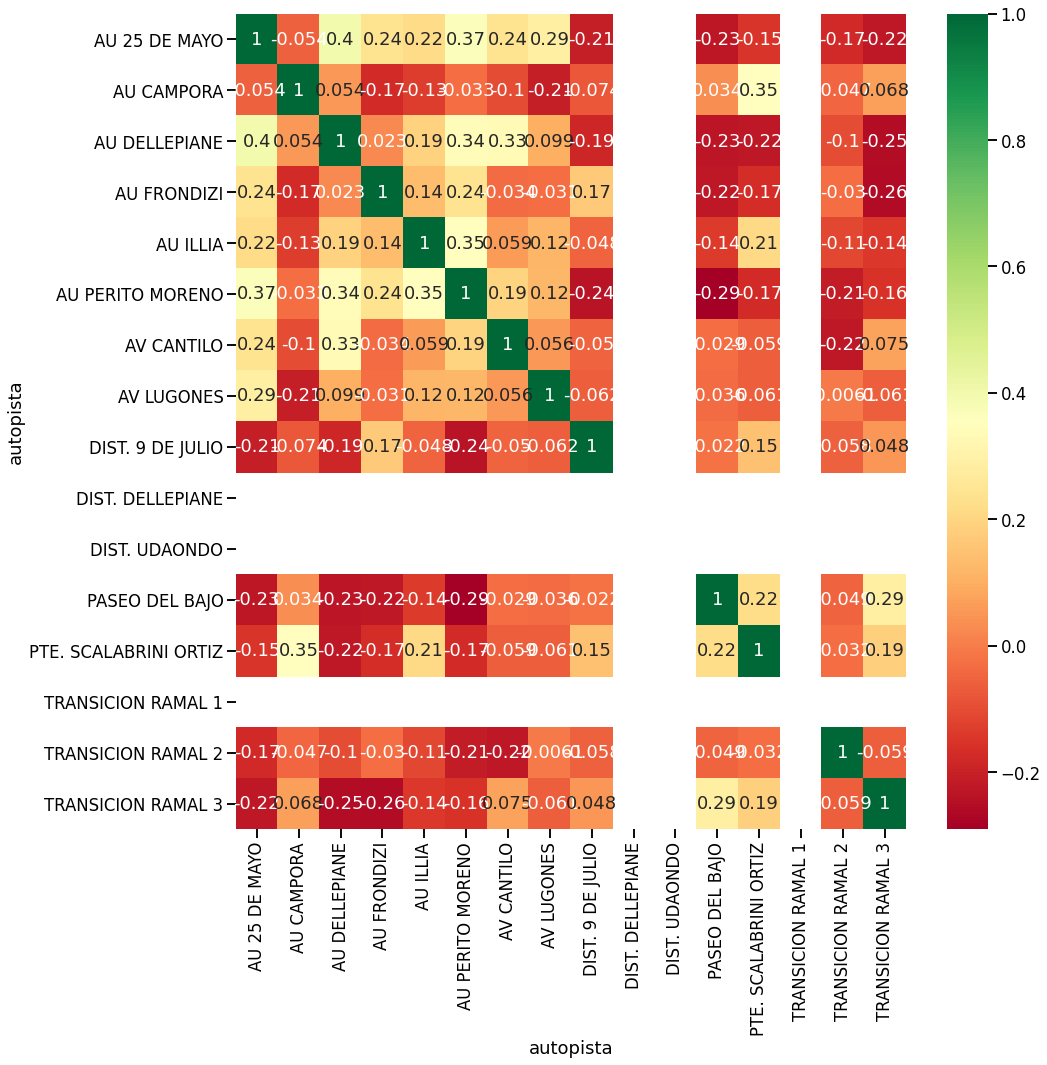

In [ ]:
#Matriz de correlacion 
plt.figure(figsize=(15,15))
g = sns.heatmap(correlacion,annot=True,cmap="RdYlGn")



Conclusiones: se procedió a correlacionar por periodo mes-año y se puede observar que hay una baja correlación lineal, siendo la máxima 0.40. Respecto a los valores blancos deducimos que es por la baja cantidad de valores. Ambos valores que no correlacionan son "distribuidores", son zonas de interconexión de autopistas por lo que se puede suponer que no se registraron intervenciones en estos nodos.

## * Análisis cuantitativo de las intervenciones

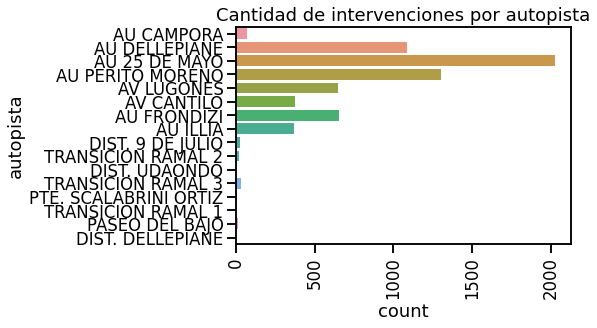

In [ ]:
#Cantidad de intervenciones por autopista
sns.set_context("talk")
az = sns.countplot(y="autopista", data=intervenciones)
plt.xticks(rotation=90)
plt.title("Cantidad de intervenciones por autopista")
plt.show()

Efectivamente, llegamos a la conclusión que las autopistas que aparecen en blanco en el Heatmap no correlacionan con ningnuna debido a la baja cantidad de datos.

Veamos ahora como se distribuyen las intervenciones según el estado de la superficie

In [ ]:
pivot01 = pd.pivot_table(intervenciones, values = 'lesionados', columns = 'superficie_de_la_via', index = 'mes',fill_value=0, aggfunc = np.sum)


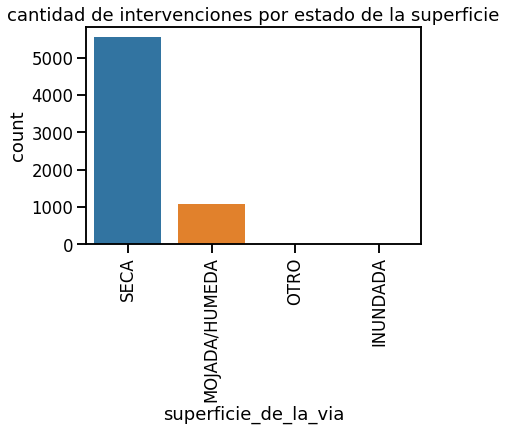

In [ ]:
sns.set_context("talk")
az = sns.countplot(x="superficie_de_la_via", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de intervenciones por estado de la superficie")
plt.show()

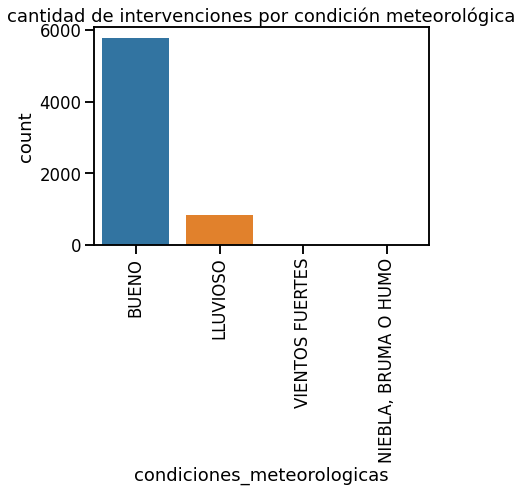

In [ ]:
sns.set_context("talk")
az = sns.countplot(x="condiciones_meteorologicas", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de intervenciones por condición meteorológica")
plt.show()

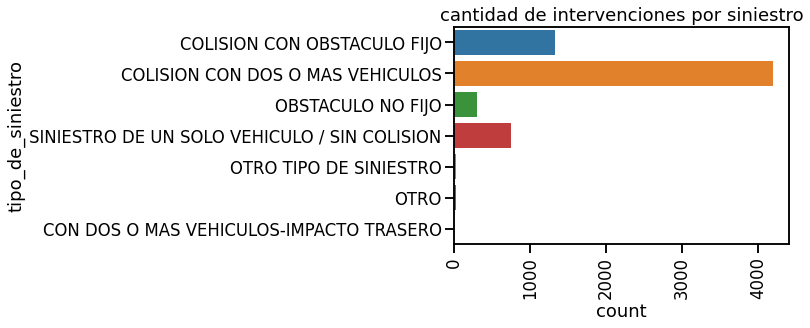

In [ ]:
sns.set_context("talk")
az = sns.countplot(y="tipo_de_siniestro", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de intervenciones por siniestro")
plt.show()

## * Intervenciones y reclamos

A continuación, se procede a cruzar los datos del dataset con otra base de datos del gobierno en donde se muestran los reclamos realizados en relación a las autopistas AUSA. La selección del dataset se hizo el 17/10/2020.

Link a dataset: https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa/archivo/7b5b58ad-3667-4def-be06-239ff470250c

In [ ]:
#Importamosdos dataset
reclamos = pd.read_csv('/content/drive/My Drive/Data Science/reclamos-ausa.csv')

El dataset reclamos-ausa.csv tiene registros desde 01/12/2016 hasta 23/04/2019

Recordamos que el dataset de intervenciones que venimos utilizando hasta acá comprende registros entre 01/01/2014 y 31/07/2020

Por esta razón vamos a filtrar los dataset para que coincidan en las fechas: 01/2017 - 04/2019

Pipeline: Filtrar los datasets, agregarle una columna llena de unos(1) para luego poder agrupar por mes la cantidad de reclamos y comparar con la cantidad de lesionados del dataset intervenciones.

Preparamos "reclamos" para unirlo luego

In [ ]:
#Transformamos la columna "fecha"  a formato fecha ya que estaba en fomrato str
reclamos.fecha=pd.to_datetime(reclamos.fecha)

#Agregamos columna "month_year", "year" y "UNOS" al dataset reclamos.
reclamos['year'] = reclamos.fecha.dt.year
reclamos['month_year'] = reclamos['fecha'].dt.to_period('M')
reclamos['UNOS'] = 1
reclamos.head(2)

,nro_caso,titulo_caso,fecha,year,month_year,UNOS
0,C00126163,RECLAMOS/VUELTO ERRONEO/FALTANTE,2016-12-01 15:47:26,2016,2016-12,1
1,C00126165,RECLAMOS/DAÑO DEL VEHICULO SOBRE AU./OBJETO,2016-12-01 16:01:31,2016,2016-12,1


In [ ]:
#Filtramos "reclamos" para no tener en cuenta los 19 días del año 2016.
reclamos_17_18= reclamos.loc[reclamos.year >= 2017]
np.shape(reclamos_17_18)


(5487, 6)

In [ ]:
reclamos_17_18 = reclamos_17_18.groupby(["month_year"],as_index=False)["UNOS"].sum()
reclamos_17_18=reclamos_17_18.rename(columns={"UNOS": "cant_intervenciones"})
reclamos_17_18.head()

,month_year,cant_intervenciones
0,2017-01,191
1,2017-02,185
2,2017-03,261
3,2017-04,167
4,2017-05,218


Preparamos "intervenciones" para unirlo luego

In [ ]:
#Agregamos columna de unos y filtramos "intervenciones" entre 01/2017 - 04/2019 para analizar el mismo periodo respecto a reclamos.
intervenciones["unos"] = 1
intervenciones_filt = intervenciones.loc[(intervenciones.periodo >= 201701)&(intervenciones.periodo <= 201904) ]
intervenciones_filt.tail(2)


,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,dia,mes,año,month_year,unos
5783,201904,2019-04-30,17,AU PERITO MORENO,DESCENDENTE,5800,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,0,30,4,2019,2019-04,1
5784,201904,2019-04-30,21,AV CANTILO,ASCENDENTE,8300,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,30,4,2019,2019-04,1


In [ ]:
intervenciones_filtxmes = intervenciones_filt.groupby(["month_year"])["lesionados","unos"].sum()
intervenciones_filtxmes=intervenciones_filtxmes.rename(columns={"unos": "cant_reclamos"})
intervenciones_filtxmes.head(12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,lesionados,cant_reclamos
month_year,,
2017-01,76,78
2017-02,47,82
2017-03,46,89
2017-04,52,86
2017-05,60,86
2017-06,72,81
2017-07,69,90
2017-08,56,95
2017-09,48,106


In [ ]:
#Unimos la tabla de intervenciones_filtxmes con reclamos_17_18
combinado= pd.merge(intervenciones_filtxmes, reclamos_17_18, on='month_year')
combinado.head()

,month_year,lesionados,cant_reclamos,cant_intervenciones
0,2017-01,76,78,191
1,2017-02,47,82,185
2,2017-03,46,89,261
3,2017-04,52,86,167
4,2017-05,60,86,218


<Figure size 2880x288 with 0 Axes>

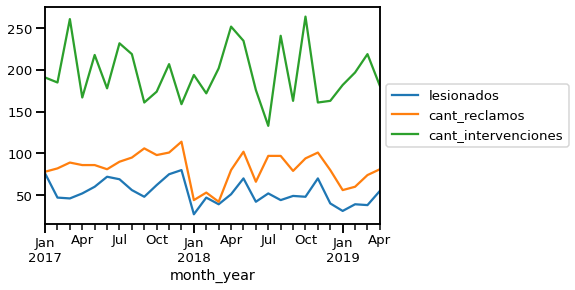

In [ ]:
sns.set_context("talk", font_scale=0.8)
plt.figure(figsize=(40,4))
combinado.plot(title = "" , x = "month_year")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Observamos como en muchos tramos la cantidad de reclamos e intervenciones tienen las mismas tendencias de variación. Si suben los lesionados también lo hacen los reclamos y viceversa. Las intervenciones no se comportan del mismo modo.